# Visualizing and animating MTA turnstile data on a map (messy notebook)

# learning goals

* show different choices of visualization, and the story-telling aspect
* show the process of data munging, and transformations between datasets
* show how to decipher errors, show all the wart-y steps in working with real data.

Some prerequisites: data types, lists, dictionaries, boolean operators.  Libraries, functions and call signatures.

PyGMT is not part of base anaconda, requires

        conda install --channel conda-forge pygmt

Do NOT use any libraries for this notebook; it's meant to show the messy, dirty process of working with raw data and getting something useful out.

Do NOT use technical / complex libraries like regex, etc... one thing at a time.

Do NOT use bash / awk / sed transformation to clean things up.

Do NOT use Makefiles.

--AaronT, 2022 July 06

In [129]:
from datetime import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#import geopandas as gpd
import pandas as pd
import pygmt

%matplotlib inline

# Load the CSV (comma separated value) data into a Pandas dataframe

In [130]:
df = pd.read_csv("dat/turnstile_220625.txt")

In [131]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2022,00:00:00,REGULAR,7726949,2716406
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2022,04:00:00,REGULAR,7726955,2716414
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2022,08:00:00,REGULAR,7726964,2716438
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2022,12:00:00,REGULAR,7726999,2716522
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2022,16:00:00,REGULAR,7727100,2716564
...,...,...,...,...,...,...,...,...,...,...,...
212407,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/24/2022,05:00:00,REGULAR,0,598
212408,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/24/2022,09:00:00,REGULAR,0,598
212409,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/24/2022,13:00:00,REGULAR,0,601
212410,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/24/2022,17:00:00,REGULAR,0,604


In [137]:
df.keys()

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [136]:
for k in df:
    print("'{:s}'".format(k))
    
    if k.strip() == k:
        print("   same stripped")
    else:
        print("   not same stripped '{:s}'".format(k.strip()))

'C/A'
   same stripped
'UNIT'
   same stripped
'SCP'
   same stripped
'STATION'
   same stripped
'LINENAME'
   same stripped
'DIVISION'
   same stripped
'DATE'
   same stripped
'TIME'
   same stripped
'DESC'
   same stripped
'ENTRIES'
   same stripped
'EXITS                                                               '
   not same stripped 'EXITS'


In [134]:
for k in df['STATION'].unique():
    print("'{:s}'".format(k))

'59 ST'
'5 AV/59 ST'
'57 ST-7 AV'
'49 ST'
'TIMES SQ-42 ST'
'34 ST-HERALD SQ'
'28 ST'
'23 ST'
'14 ST-UNION SQ'
'8 ST-NYU'
'PRINCE ST'
'CANAL ST'
'CITY HALL'
'CORTLANDT ST'
'RECTOR ST'
'WHITEHALL S-FRY'
'DELANCEY/ESSEX'
'BOWERY'
'CHAMBERS ST'
'FULTON ST'
'BROAD ST'
'7 AV'
'PARK PLACE'
'BOTANIC GARDEN'
'PROSPECT PARK'
'PARKSIDE AV'
'CHURCH AV'
'BEVERLEY ROAD'
'CORTELYOU RD'
'NEWKIRK PLAZA'
'AVENUE H'
'AVENUE J'
'AVENUE M'
'KINGS HWY'
'AVENUE U'
'NECK RD'
'SHEEPSHEAD BAY'
'BRIGHTON BEACH'
'OCEAN PKWY'
'BOROUGH HALL'
'JAY ST-METROTEC'
'DEKALB AV'
'ATL AV-BARCLAY'
'UNION ST'
'4AV-9 ST'
'25 ST'
'36 ST'
'45 ST'
'53 ST'
'BAY RIDGE AV'
'77 ST'
'86 ST'
'BAY RIDGE-95 ST'
'8 AV'
'FT HAMILTON PKY'
'NEW UTRECHT AV'
'18 AV'
'20 AV'
'BAY PKWY'
'9 AV'
'50 ST'
'55 ST'
'71 ST'
'79 ST'
'25 AV'
'BAY 50 ST'
'CONEY IS-STILLW'
'W 8 ST-AQUARIUM'
'6 AV'
'3 AV'
'1 AV'
'BEDFORD AV'
'LORIMER ST'
'GRAHAM AV'
'GRAND ST'
'MONTROSE AV'
'MORGAN AV'
'JEFFERSON ST'
'MYRTLE-WYCKOFF'
'HALSEY ST'
'WILSON AV'
'BUSHWICK AV'
'A

# Let's decipher the dataset by looking at one station: 125th St / St. Nicholas, ABCD lines.

In [139]:
#sel = (df['STATION']=='125 ST') & df['LINENAME']=='ACBD')
sel = ((df['STATION']=='125 ST') & (df['LINENAME']=='ACBD'))

In [140]:
df[sel]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
49014,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,00:00:00,REGULAR,505329,578064
49015,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,04:00:00,REGULAR,505341,578133
49016,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,08:00:00,REGULAR,505383,578174
49017,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,12:00:00,REGULAR,505475,578265
49018,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,16:00:00,REGULAR,505581,578413
...,...,...,...,...,...,...,...,...,...,...,...
49681,N026,R102,00-05-01,125 ST,ACBD,IND,06/24/2022,04:00:00,REGULAR,327680,681
49682,N026,R102,00-05-01,125 ST,ACBD,IND,06/24/2022,08:00:00,REGULAR,327680,683
49683,N026,R102,00-05-01,125 ST,ACBD,IND,06/24/2022,12:00:00,REGULAR,327680,686
49684,N026,R102,00-05-01,125 ST,ACBD,IND,06/24/2022,16:00:00,REGULAR,327680,686


In [141]:
dt = df['DATE'] + " " + df['TIME']
dt = pd.to_datetime(dt)

In [142]:
dt[0]

Timestamp('2022-06-18 00:00:00')

## Let's try plotting the turnstile entry data over time.

It looks like junk!  Why?  Hint: there's a lot of repeated timestamps, and it turns out to correspond to different turnstiles in the same station.

In [ ]:
plt.plot(
    dt[sel], df['ENTRIES'][sel], '.-'
)
plt.show()

In [ ]:
np.diff( dt[sel] ) / 1e9 / 3600

In [ ]:
df[sel]['SCP'].unique()

## Let's further specialize by looking at only one turnstile

In [143]:
sel2 = sel & (df['SCP'] == '01-00-00')

In [144]:
df[sel2]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
49014,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,00:00:00,REGULAR,505329,578064
49015,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,04:00:00,REGULAR,505341,578133
49016,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,08:00:00,REGULAR,505383,578174
49017,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,12:00:00,REGULAR,505475,578265
49018,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,16:00:00,REGULAR,505581,578413
49019,N025,R102,01-00-00,125 ST,ACBD,IND,06/18/2022,20:00:00,REGULAR,505673,578662
49020,N025,R102,01-00-00,125 ST,ACBD,IND,06/19/2022,00:00:00,REGULAR,505708,578832
49021,N025,R102,01-00-00,125 ST,ACBD,IND,06/19/2022,04:00:00,REGULAR,505718,578888
49022,N025,R102,01-00-00,125 ST,ACBD,IND,06/19/2022,08:00:00,REGULAR,505753,578914
49023,N025,R102,01-00-00,125 ST,ACBD,IND,06/19/2022,12:00:00,REGULAR,505821,579006


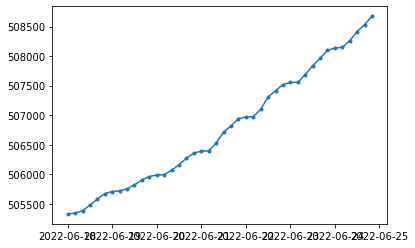

In [145]:
plt.plot(
    dt[sel2], df['ENTRIES'][sel2], '.-'
)
plt.show()

In [146]:
plt.plot(
    dt[sel2], df['EXITS'][sel2], '.-'
)
plt.show()

KeyError: 'EXITS'

In [147]:
df.keys()

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [148]:
df['EXITS                                                               ']

0         2716406
1         2716414
2         2716438
3         2716522
4         2716564
           ...   
212407        598
212408        598
212409        601
212410        604
212411        604
Name: EXITS                                                               , Length: 212412, dtype: int64

In [149]:
df = df.rename(columns={'EXITS                                                               ': "EXITS"})

In [150]:
df.keys()

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [166]:
dt[0]

Timestamp('2022-06-18 00:00:00')

In [170]:
dt[sel2][0:4]

49014   2022-06-18 00:00:00
49015   2022-06-18 04:00:00
49016   2022-06-18 08:00:00
49017   2022-06-18 12:00:00
dtype: datetime64[ns]

(19160.833333333336, 19168.166666666664)


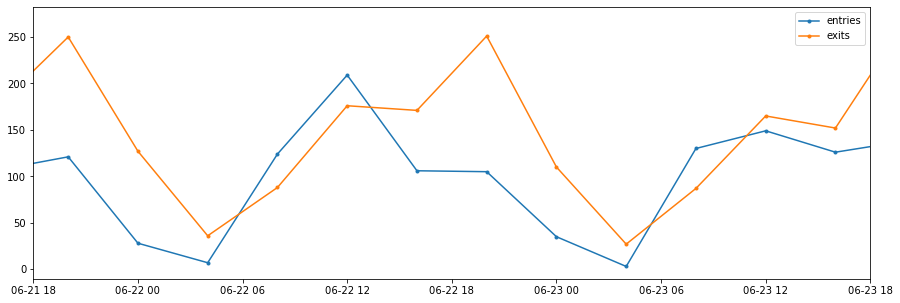

In [176]:
plt.figure(figsize=(15,5))
plt.plot(
    dt[sel2][1:], np.diff( df['ENTRIES'][sel2] ), '.-', label='entries'
)
plt.plot(
    dt[sel2][1:], np.diff( df['EXITS'][sel2] ), '.-', label='exits'
)
plt.legend()

print(plt.xlim())
plt.xlim(19160.75+4, 19162.75+4)

plt.show()

## Immediate next steps

Method to fix up CSV-read keys

Method to condense all turnstile data together, given a station name

Method to find for a given turnstile, any data that is NOT monotonic.


C/A = control area
UNIT = ???
SCP = turnstile identifier
DESC = ???    (out of 212412 entries, 211437 regular and 975 "recovr aud"

In [178]:
df['DATE']

0         06/18/2022
1         06/18/2022
2         06/18/2022
3         06/18/2022
4         06/18/2022
             ...    
212407    06/24/2022
212408    06/24/2022
212409    06/24/2022
212410    06/24/2022
212411    06/24/2022
Name: DATE, Length: 212412, dtype: object

In [179]:
df['TIME']

0         00:00:00
1         04:00:00
2         08:00:00
3         12:00:00
4         16:00:00
            ...   
212407    05:00:00
212408    09:00:00
212409    13:00:00
212410    17:00:00
212411    21:00:00
Name: TIME, Length: 212412, dtype: object

In [ ]:
def turnstile()

In [ ]:
asdf = df['DESC'] == 'RECOVR AUD'

In [ ]:
df[asdf]

In [ ]:
df['DESC'].unique()

In [121]:
region = [-74.2, -73.8, 40.6, 40.9]
grid = pygmt.datasets.load_earth_relief(resolution="01s", region=region)

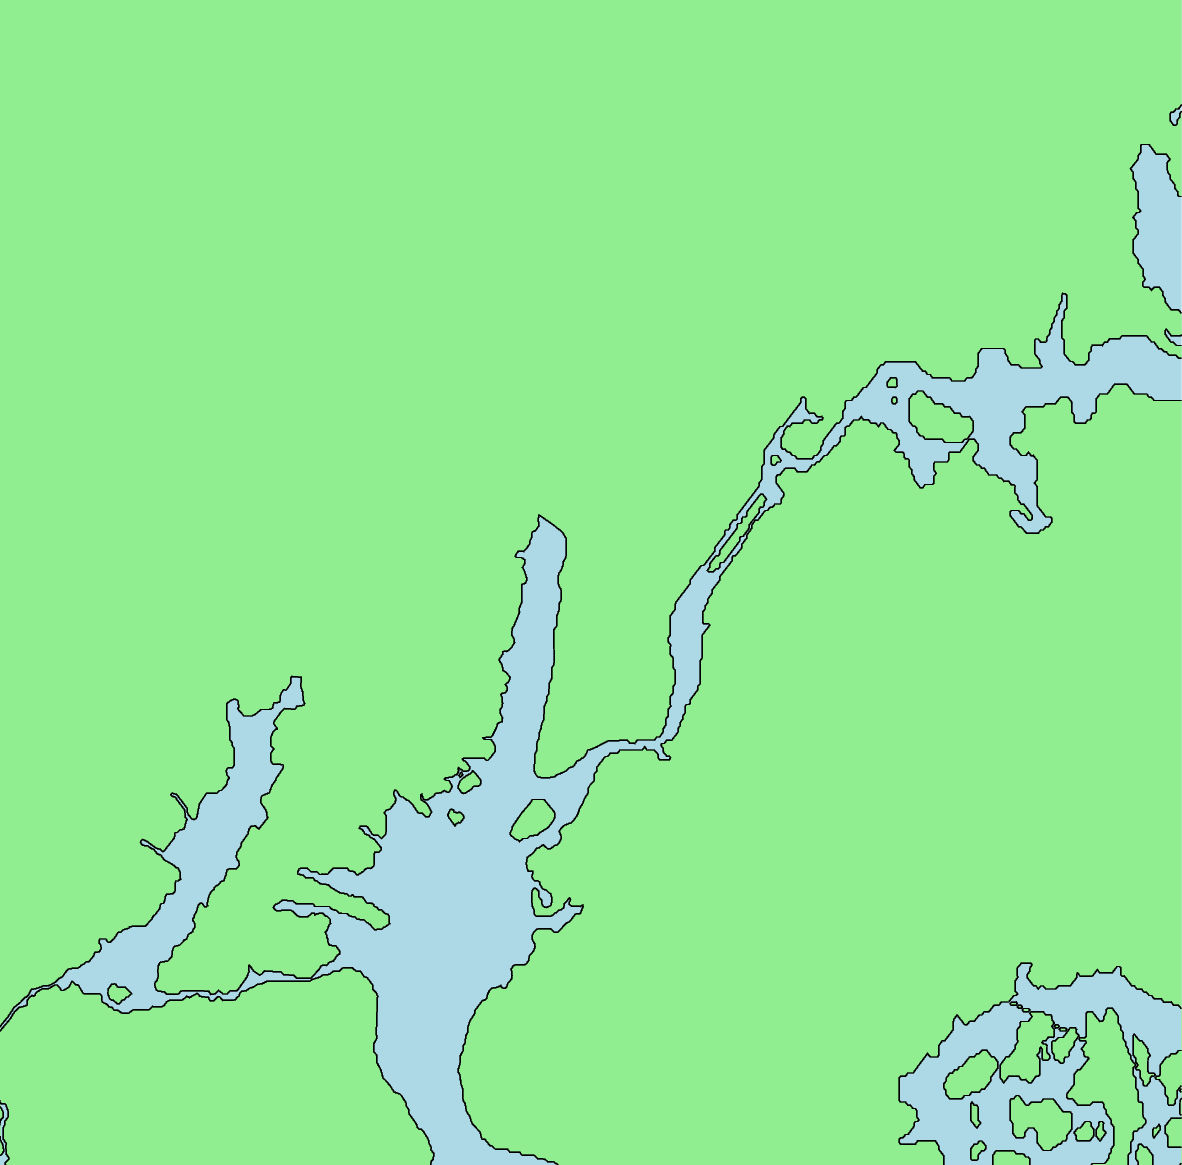

In [122]:
fig = pygmt.Figure()
fig.coast(
    region=region,
    shorelines=True,
    #shorelines=["1"],#, "2", "3", "4"],
    resolution="f",
    projection="M10c",
    land="lightgreen",
    water="lightblue",
)
fig.show()

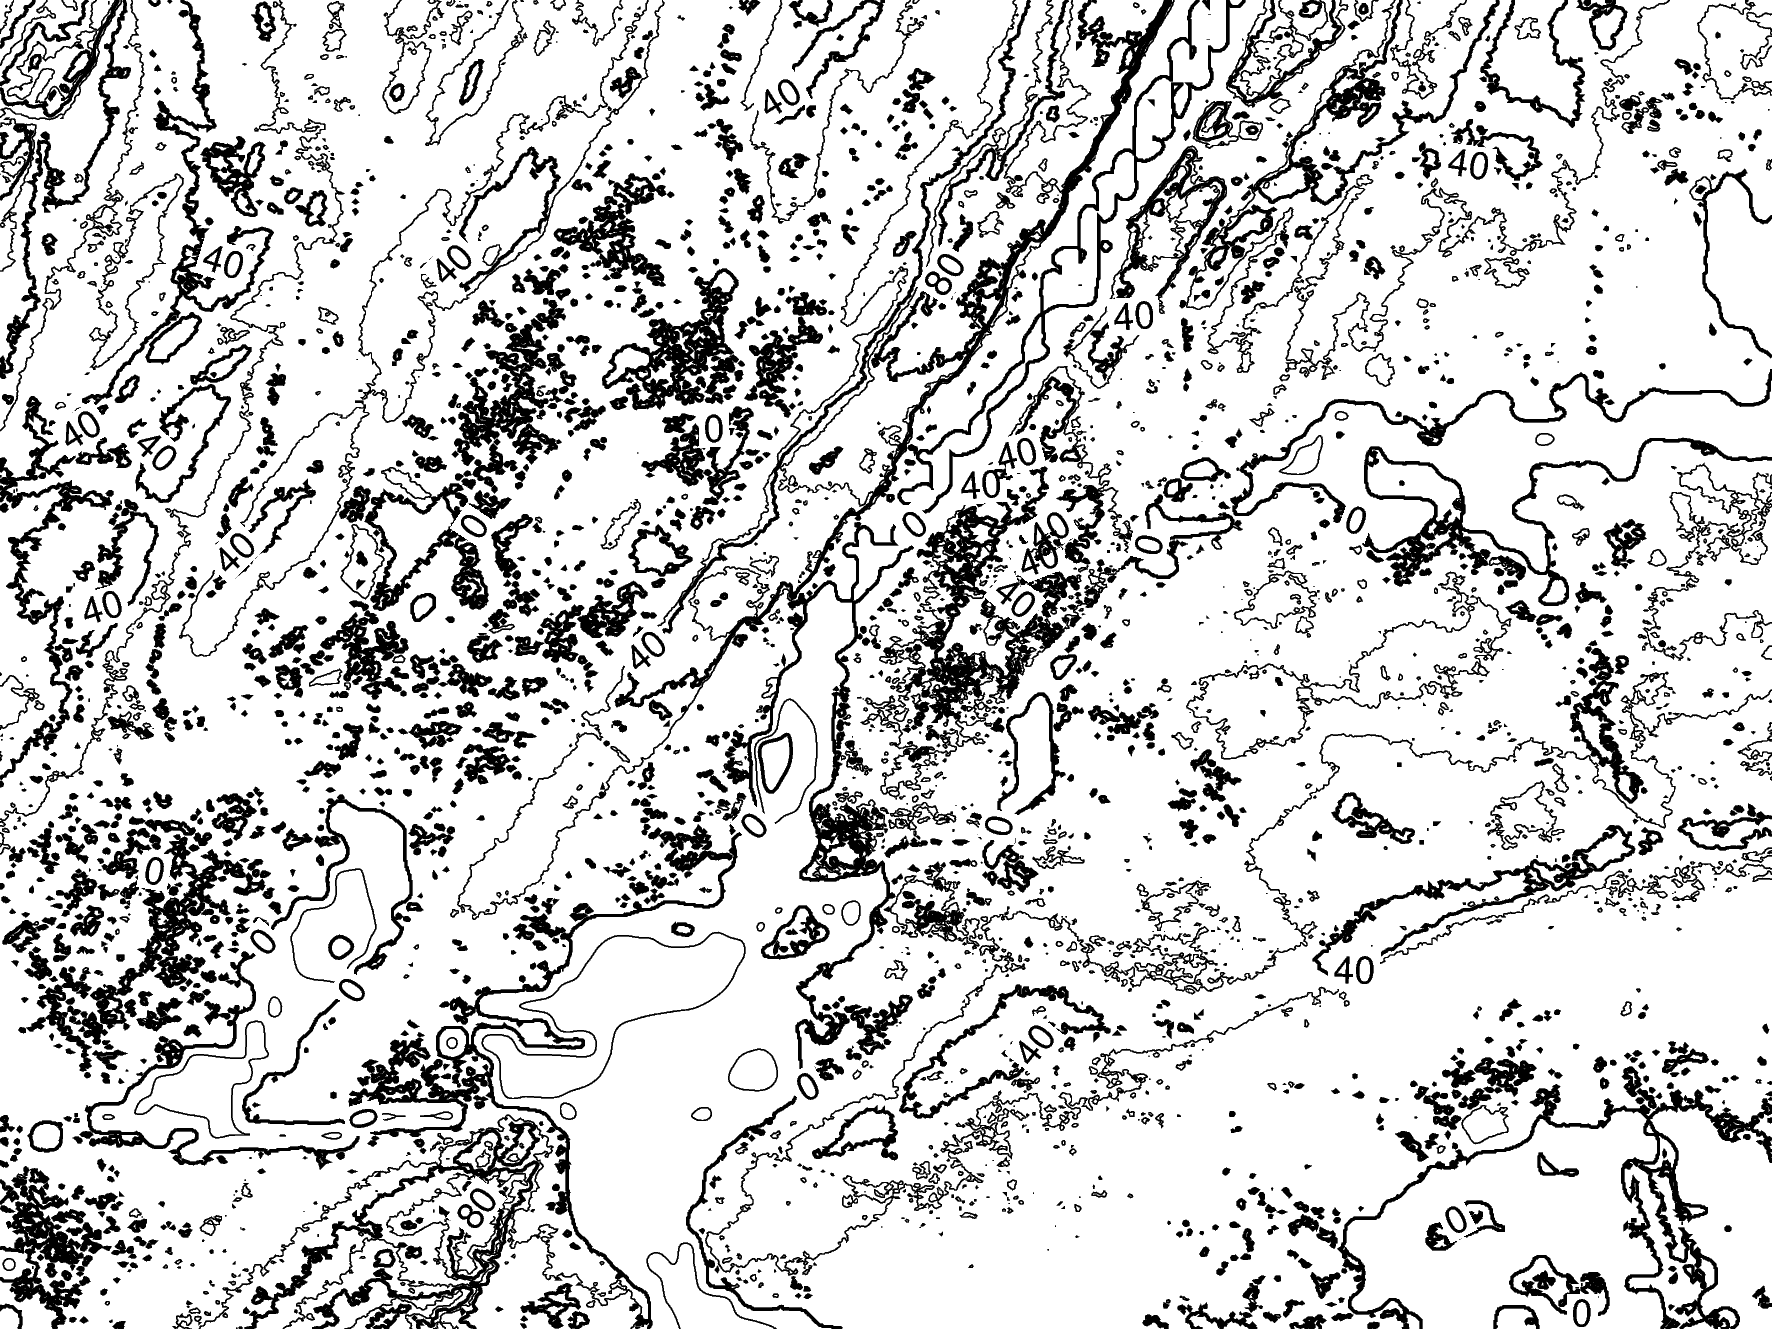

In [123]:
fig = pygmt.Figure()
fig.grdcontour(grid=grid)
fig.show()

In [124]:
entries = np.diff(df['ENTRIES'][sel2])

In [125]:
max(entries**0.5)

14.45683229480096

In [126]:
min(entries**0.5)

1.7320508075688772

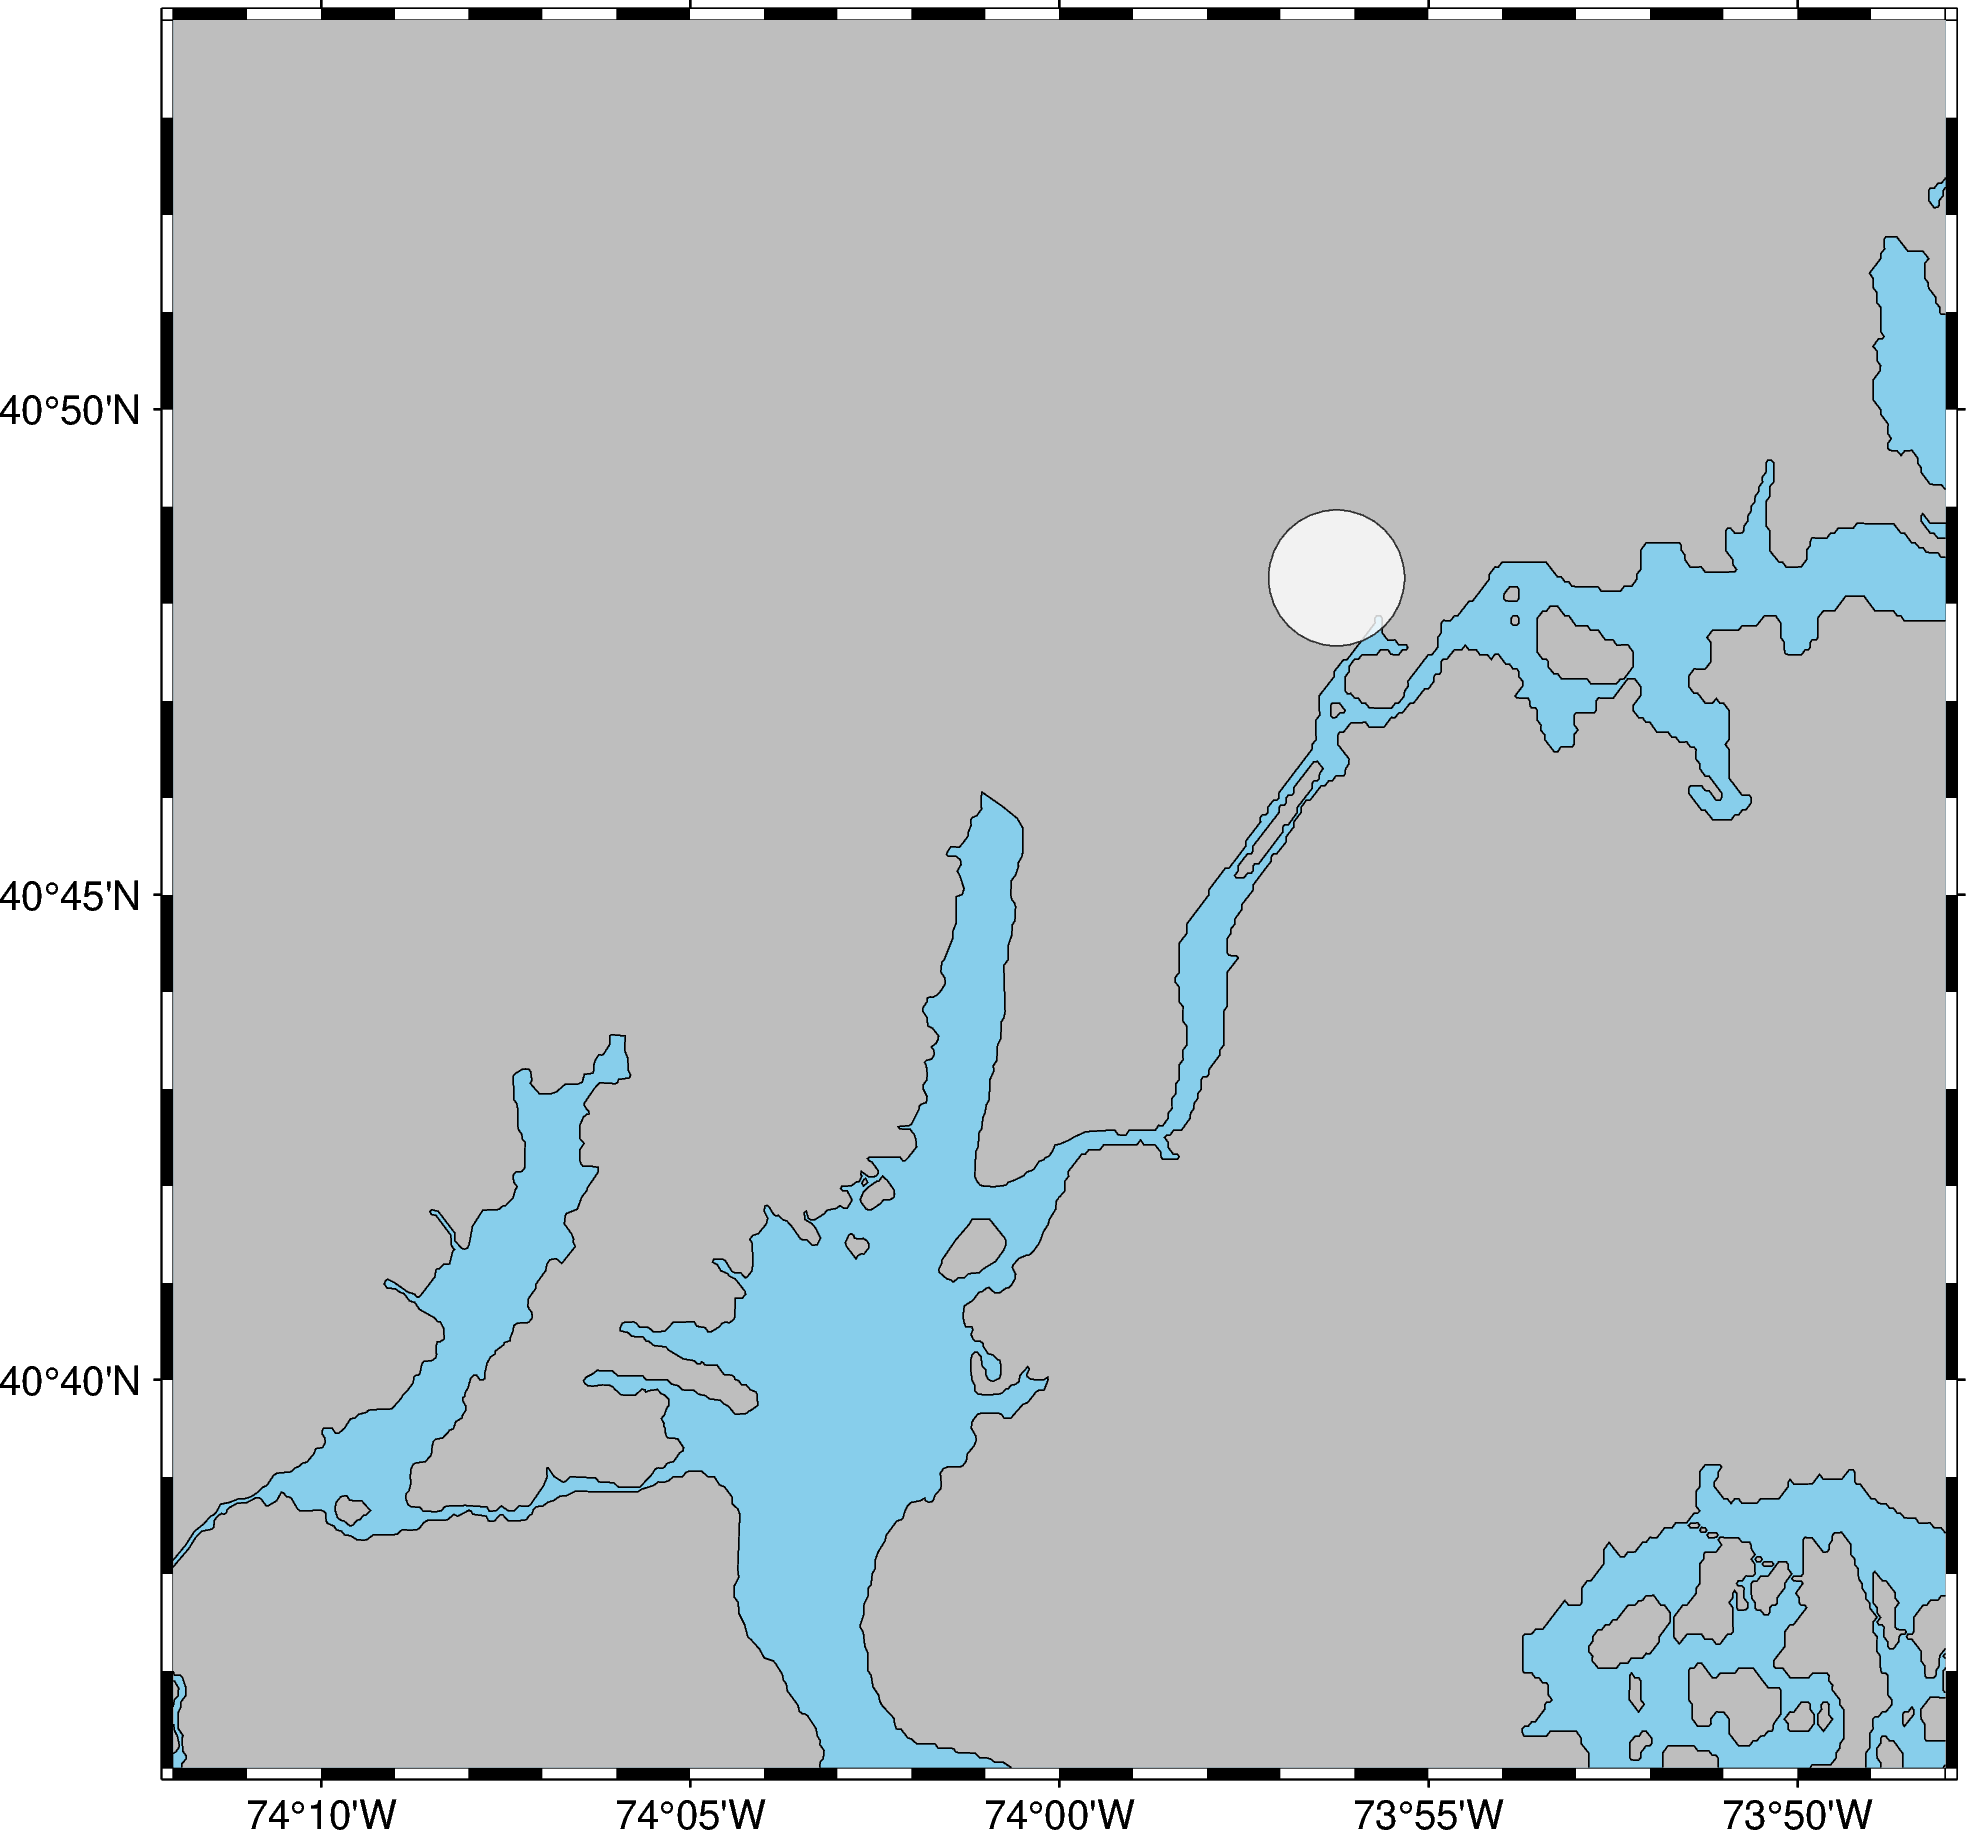

In [120]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(
    land="grey",
    water="skyblue",
    rivers="a/red",
    shorelines=True,
    resolution="f",
)
fig.plot(
    x=[-73.9374],
    y=[40.8044],
    size=[(entries[ii]**0.5)/10],
    style="cc",
    color="white",
    pen="black",
    transparency=20,
)
fig.show()

In [ ]:
for ii, x in enumerate(entries):

    fig = pygmt.Figure()
    fig.basemap(region=region, projection="M15c", frame=True)
    fig.coast(land="black", water="skyblue")
    fig.plot(x=-73.9374, y=40.8044,
             style="c{:.2f}c".format((entries[ii]**0.5)/10), color="white", pen="black")
    fig.show()

In [ ]:
entries**5